In this project, we’ll apply k-means clustering to our Enron financial data. Our final goal, of course, is to identify persons of interest; since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering.

Nonetheless, you’ll get some hands-on practice with k-means in this project, and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.

https://github.com/mudspringhiker/ud120-projects/blob/master/k_means/k_means_cluster.py

The starter code can be found in k_means/k_means_cluster.py, which reads in the email + financial (E+F) dataset and gets us ready for clustering. You’ll start with performing k-means based on just two financial features--take a look at the code, and determine which features the code uses for clustering.

Run the code, which will create a scatterplot of the data. Think a little bit about what clusters you would expect to arise if 2 clusters are created.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def featureFormat(dictionary, features, remove_NaN=True,
                  remove_all_zeroes=False, remove_any_zeroes=False, sort_keys=False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """
    return_list = []
    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print "error: key ", feature, " not present"
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [3]:
def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

In [4]:
def Draw(pred, features, poi, mark_poi=False, name="image.png",
         f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters"""
    ### plot each cluster with a different color-- add more colors for
    ### drawing more than five clusters
    colors= ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])
    ### if you like, place red stars over points that are POIs
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [5]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../ud120-projects/final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [6]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

In [7]:
data

array([[  0.00000000e+00,   3.65788000e+05,   0.00000000e+00],
       [  0.00000000e+00,   2.67102000e+05,   6.68054400e+06],
       [  0.00000000e+00,   1.70941000e+05,   4.89034400e+06],
       [  0.00000000e+00,   0.00000000e+00,   6.51850000e+05],
       [  1.00000000e+00,   2.43293000e+05,   5.53800100e+06],
       [  0.00000000e+00,   2.67093000e+05,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   4.93489000e+05],
       [  0.00000000e+00,   3.70448000e+05,   1.10405400e+06],
       [  0.00000000e+00,   0.00000000e+00,   5.21056900e+06],
       [  0.00000000e+00,   1.97091000e+05,   8.80290000e+05],
       [  0.00000000e+00,   1.30724000e+05,   2.28276800e+06],
       [  0.00000000e+00,   2.88589000e+05,   0.00000000e+00],
       [  0.00000000e+00,   2.48546000e+05,   7.65313000e+05],
       [  0.00000000e+00,   2.57486000e+05,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   2.21827500e+06],
       [  0.00000000e+00,   0.00000000e+00,   3.7220500

In [8]:
finance_features

[array([ 365788.,       0.]),
 array([  267102.,  6680544.]),
 array([  170941.,  4890344.]),
 array([      0.,  651850.]),
 array([  243293.,  5538001.]),
 array([ 267093.,       0.]),
 array([      0.,  493489.]),
 array([  370448.,  1104054.]),
 array([       0.,  5210569.]),
 array([ 197091.,  880290.]),
 array([  130724.,  2282768.]),
 array([ 288589.,       0.]),
 array([ 248546.,  765313.]),
 array([ 257486.,       0.]),
 array([       0.,  2218275.]),
 array([      0.,  372205.]),
 array([ 288542.,       0.]),
 array([  251654.,  1056320.]),
 array([ 288558.,  185063.]),
 array([ 63744.,      0.]),
 array([       0.,  1030329.]),
 array([  357091.,  4346544.]),
 array([ 271442.,   81042.]),
 array([ 0.,  0.]),
 array([    0.,  3285.]),
 array([  304110.,  1441898.]),
 array([ 0.,  0.]),
 array([ 187922.,       0.]),
 array([ 0.,  0.]),
 array([  213625.,  1465734.]),
 array([  249201.,  1635238.]),
 array([     0.,  98718.]),
 array([ 231330.,       0.]),
 array([ 0.,  0.]),
 a

In [9]:
poi

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0]

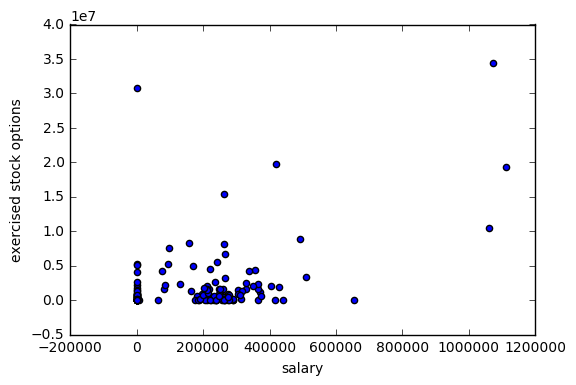

In [11]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.xlabel('salary')
plt.ylabel('exercised stock options')
plt.show()

Cluster here. Create predictions of the cluster labels for the data and store them to a list called pred.

Example code can be found here:

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(finance_features)

In [14]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [15]:
kmeans.cluster_centers_

array([[   170272.39285714,   1281376.39285714],
       [   573218.8       ,  23904558.        ]])

In [16]:
pred = kmeans.predict(finance_features)

Rename the "name" parameter when you change the number of features so that the figure gets save to a different file:

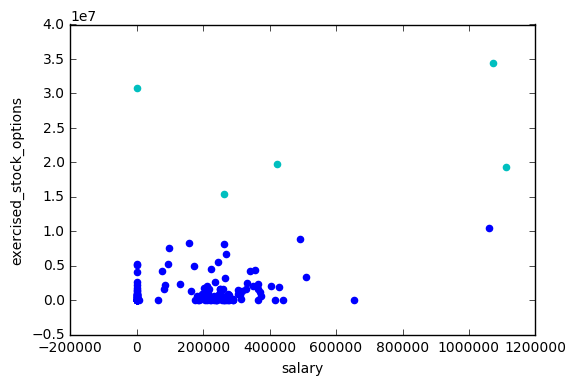

In [18]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters121016.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


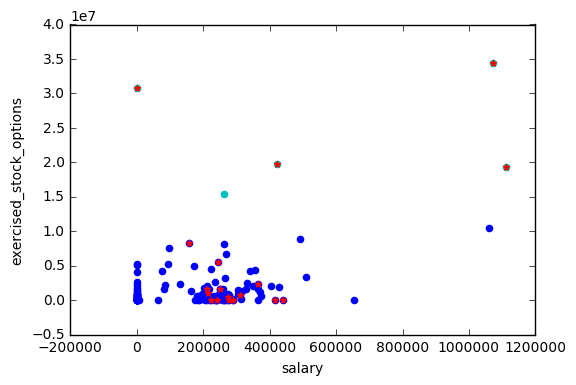

In [19]:
try:
    Draw(pred, finance_features, poi, mark_poi=True, name="clusters121016b.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


Are the clusters what you expected?

No, I don't see how those clusters were right.

### Clustering with 3 Features

Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

(You'll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.)

In [20]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

In [21]:
features_list

['poi', 'salary', 'exercised_stock_options', 'total_payments']

In [22]:
data

array([[  0.00000000e+00,   3.65788000e+05,   0.00000000e+00,
          1.06182700e+06],
       [  0.00000000e+00,   2.67102000e+05,   6.68054400e+06,
          5.63434300e+06],
       [  0.00000000e+00,   1.70941000e+05,   4.89034400e+06,
          2.11725000e+05],
       [  0.00000000e+00,   0.00000000e+00,   6.51850000e+05,
          0.00000000e+00],
       [  1.00000000e+00,   2.43293000e+05,   5.53800100e+06,
          2.88682000e+05],
       [  0.00000000e+00,   2.67093000e+05,   0.00000000e+00,
          6.28522000e+05],
       [  0.00000000e+00,   0.00000000e+00,   4.93489000e+05,
          1.84822700e+06],
       [  0.00000000e+00,   3.70448000e+05,   1.10405400e+06,
          4.09977100e+06],
       [  0.00000000e+00,   0.00000000e+00,   5.21056900e+06,
          3.13186000e+06],
       [  0.00000000e+00,   1.97091000e+05,   8.80290000e+05,
          1.73762900e+06],
       [  0.00000000e+00,   1.30724000e+05,   2.28276800e+06,
          3.10022400e+06],
       [  0.00000000e

In [23]:
finance_features

[array([  365788.,        0.,  1061827.]),
 array([  267102.,  6680544.,  5634343.]),
 array([  170941.,  4890344.,   211725.]),
 array([      0.,  651850.,       0.]),
 array([  243293.,  5538001.,   288682.]),
 array([ 267093.,       0.,  628522.]),
 array([       0.,   493489.,  1848227.]),
 array([  370448.,  1104054.,  4099771.]),
 array([       0.,  5210569.,  3131860.]),
 array([  197091.,   880290.,  1737629.]),
 array([  130724.,  2282768.,  3100224.]),
 array([  288589.,        0.,  1130461.]),
 array([  248546.,   765313.,  2014835.]),
 array([  257486.,        0.,  1545059.]),
 array([       0.,  2218275.,   966522.]),
 array([      0.,  372205.,       0.]),
 array([  288542.,        0.,  1490344.]),
 array([  251654.,  1056320.,  3202070.]),
 array([ 288558.,  185063.,  551174.]),
 array([  63744.,       0.,  762135.]),
 array([       0.,  1030329.,    87410.]),
 array([  357091.,  4346544.,  1798780.]),
 array([  271442.,    81042.,  3471141.]),
 array([ 0.,  0.,  0.]),
 

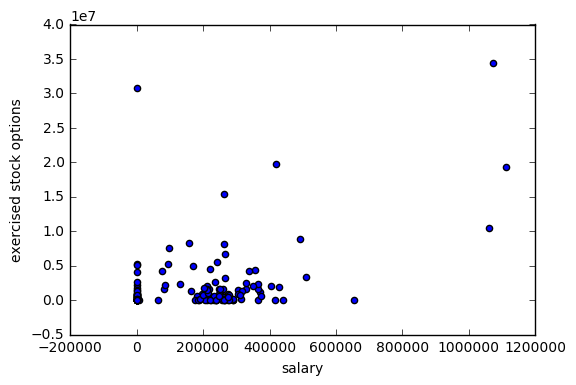

In [24]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.xlabel('salary')
plt.ylabel('exercised stock options')
plt.show()

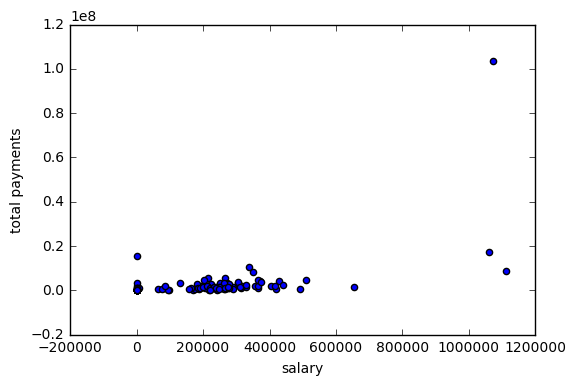

In [25]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, _, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.xlabel('salary')
plt.ylabel('total payments')
plt.show()

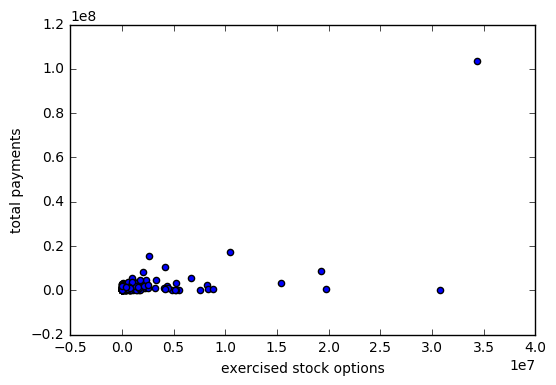

In [26]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for _, f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.xlabel('exercised stock options')
plt.ylabel('total payments')
plt.show()

Clustering

In [27]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(finance_features)

In [28]:
pred = kmeans.predict(finance_features)

Plot

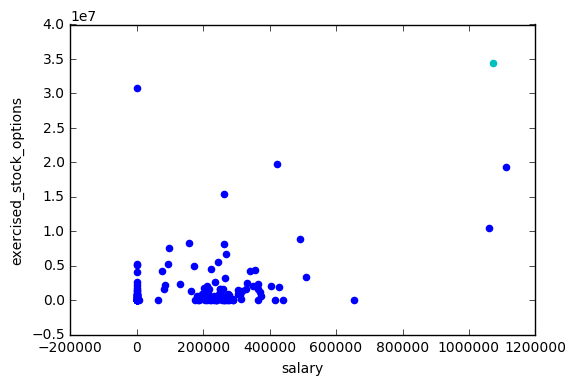

In [30]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters_3features.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

As comparison:

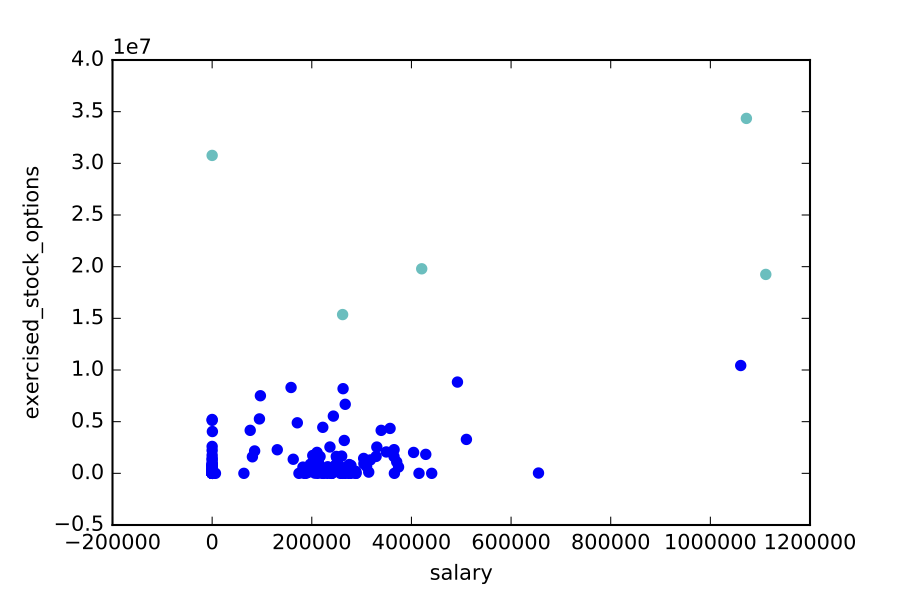

In [35]:
from IPython.display import Image
Image('clusters.png')

<-- four of the points changed clusters

### Stock option range

In the next lesson, we’ll talk about feature scaling. It’s a type of feature preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [41]:
eso = []
for key in data_dict:
    if data_dict[key]["exercised_stock_options"] != "NaN":
        eso.append(data_dict[key]["exercised_stock_options"])

Minimum exercised_stock_options:

In [42]:
min(eso)

3285

Maximum exercised_stock_options:

In [43]:
max(eso)

34348384

### Salary range

What are the maximum and minimum values taken by “salary”?

(NB: same caveat as in the last quiz. If you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [44]:
salary = []
for key in data_dict:
    if data_dict[key]["salary"] != "NaN":
        salary.append(data_dict[key]["salary"])

Minimum salary

In [45]:
min(salary)

477

Maxium salary

In [46]:
max(salary)

1111258

### Clustering Changes

The plot on the next slide shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.

We want you to compare the clustering with scaling (on the next slide) with the first clustering visualization you produced, when you used two features in your clustering algorithm.

Notice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.

In the next lesson you’ll learn a lot more about what feature scaling means, but for now, just look at the effect on the clusters--which point(s) switch their associated cluster?

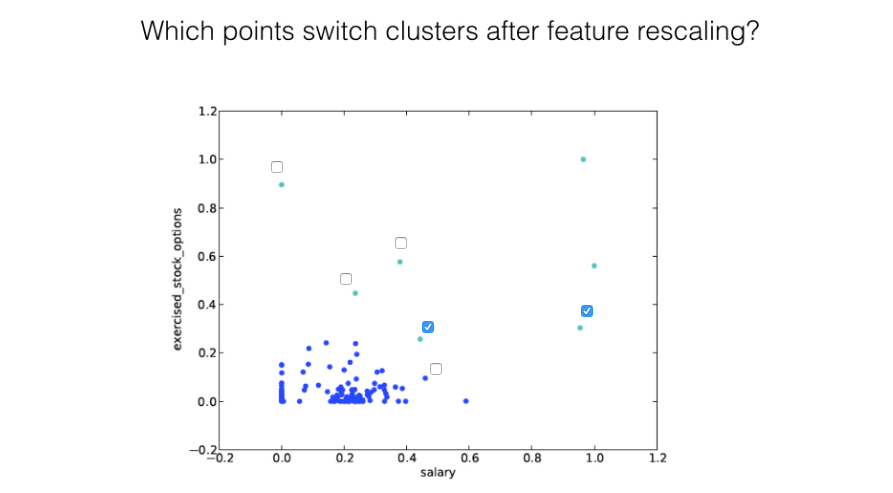

In [47]:
Image('clusteringchanges.png')